In [6]:
# anscombe 4분할 그래프로 Visualization의 중요성을 이해해보자
import seaborn as sns
# 샘플 데이터 셋의 목록
#sns.get_dataset_names()
# 앤스콤 데이터셋 로드
anscombe = sns.load_dataset("anscombe")

# 데이터 확인
print(type(anscombe))
anscombe

<class 'pandas.core.frame.DataFrame'>


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [8]:
# anscombe 데이터셋에서 dataset이 몇 개 있는지 확인
anscombe['dataset'].nunique() # 하위에 총 4개 데이터 셋이 있다

4

In [9]:
# 하위 데이터 셋으로 분할
ds1 = anscombe[anscombe['dataset'] == 'I'] # 1번 하위 데이터 셋
ds2 = anscombe[anscombe['dataset'] == 'II'] # 2번 하위 데이터 셋
ds3 = anscombe[anscombe['dataset'] == 'III'] # 3번 하위 데이터 셋
ds4 = anscombe[anscombe['dataset'] == 'IV'] # 4번 하위 데이터 셋

In [11]:
# 일반적인 가정: 복수의 데이터 셋이 평균 분산 상관관계 회귀선 등이 일치하려면 해당 데이터 셋들은 같은 데이터 일 것이다
# 앤스콤의 주장-> 앤스콤은 기초 통계량이 같더라도 데이터 분포는 다를 수 있다 그래서 데이터의 시각화가 중요하다
# DATASET1 의 기초 통계량
ds1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [12]:
# DATASET2 의 기초 통계량
ds2.describe()
# DATASET1~4 의 기초 통계량을 비교해보면 거의 일치할 것

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


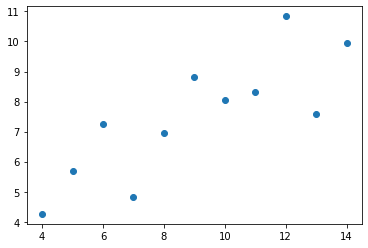

In [13]:
# dataset 1을 그래프로 표현
import matplotlib.pyplot as plt
plt.plot(ds1['x'], ds1['y'], 'o')

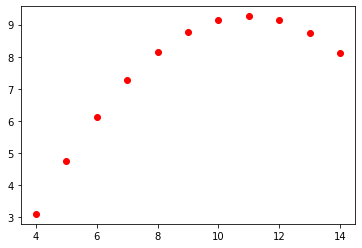

In [15]:
# dataset 2의 그래프
plt.plot(ds2['x'], ds2['y'], 'o', color="red")

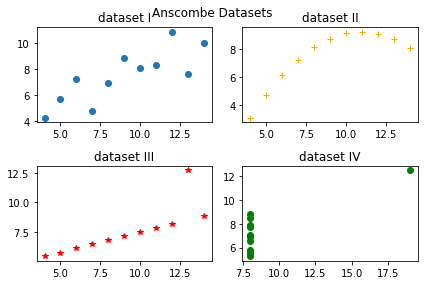

In [25]:
# matplotlib로 그래프 그리기
# 1. 기본 틀 만들기(figure)
# 2. 내부에 격자를 만들고 서브 플롯을 생성(add_subplot)
# 3. 각 격자에 플롯을 그린다
# 4. 타이틀, 기본틀의 제목 등 부가적 작업을 수행

# 2x2 격자를 만들고 각 격자에 I~IV데이터 셋의 플롯 그리기
fig = plt.figure() # 기본 틀 생성
# 기본 틀에 격자 추가 -> 서브플롯 추가
ax1 = fig.add_subplot(2, 2, 1) # 2x2 격자의 1번 영역
ax2 = fig.add_subplot(2, 2, 2) # 2x2 격자의 2번 영역
ax3 = fig.add_subplot(2, 2, 3) # 2x2 격자의 3번 영역
ax4 = fig.add_subplot(2, 2, 4) # 2x2 격자의 4번 영역

# 각 격자에 개별 데이터셋의 플롯을 그리기
ax1.plot(ds1['x'], ds1['y'], 'o')
ax2.plot(ds2['x'], ds2['y'], '+', color="orange")
ax3.plot(ds3['x'], ds3['y'], '*', color="red")
ax4.plot(ds4['x'], ds4['y'], 'o', color="green")

# 각 서브플롯의 타이틀을 추가
ax1.set_title("dataset I")
ax2.set_title("dataset II")
ax3.set_title("dataset III")
ax4.set_title("dataset IV")

# 전체 그래프의 타이틀 추가
fig.suptitle("Anscombe Datasets")
# 전체 레이아웃 조절
fig.tight_layout()

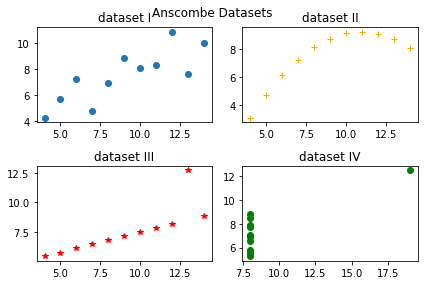

In [26]:
#최종 플롯의 출력
fig

In [31]:
# 산점도 그래프
# 두 개의 변수 사이의 관계를 표시하는 그래프
# mtcars 데이터 셋의 wt, mpg 관계
import pandas as pd
mtcars = pd.read_csv("./data/mtcars.csv")

# 데이터 확인
size = mtcars.shape
print("mtcars {}행 {}열의 데이터셋:".format(size[0], size[1]))
print(mtcars.head())
print(mtcars.tail())
mtcars.describe()

mtcars 32행 12열의 데이터셋:
               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
             model   mpg  cyl   disp   hp  drat     wt  qsec  vs  am  gear  \
27    Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.9   1   1     5   
28  Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.5   0   1     5   
29    Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.5   0   1     5   
30   Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.6   0   1     5   
31      Volvo 142E  21.4    4  121.0  109

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


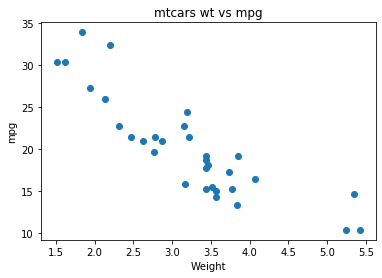

In [37]:
# 산점도 그래프
scatter_fig = plt.figure() # 기본 틀 생성
s_ax = scatter_fig.add_subplot(1, 1, 1) # 1x1 격자의 1번 영역
s_ax.scatter(mtcars['wt'], mtcars['mpg']) # x축: 중량 y축: 연비
s_ax.set_xlabel("Weight")
s_ax.set_ylabel("mpg")
s_ax.set_title("mtcars wt vs mpg")

plt.show()

In [38]:
# x축과 y축의 상관관계 corr()
mtcars.corr() # 상관 관계

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Text(0.5, 1.0, 'Box Plot of wt, mpg')

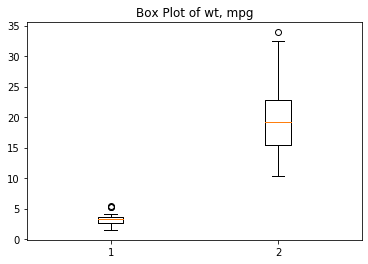

In [44]:
# 상자그림 Box Plot
# 데이터의 전반적 분포를 파악하는데 유용
# mtcars 데이터 셋에서 변수 2개 (wt, mpg) 의 데이터 분포를 알아보자
boxplot = plt.figure()
boxplot_axe = boxplot.add_subplot(1, 1, 1)
boxplot_axe.boxplot([mtcars['wt'], mtcars['mpg']])

boxplot_axe.set_title("Box Plot of wt, mpg")

In [51]:
# 극단치의 확인
# IQR (3사분위수-1사분위수)
# 상단 극단치 경계 = 3사분위수 + IQR*1.5
# 하단 극단치 경계 = 1사분위수 - IQR*1.5

#quantile -> 분위수 추출을위한 메서드
first_quantile = mtcars['mpg'].quantile(0.25) # 25%
third_quantile = mtcars['mpg'].quantile(0.75) # 75%

iqr = third_quantile - first_quantile 
print("IQR of mtcars mpg:", iqr)

border_top = third_quantile + iqr*1.5
border_bottom = first_quantile - iqr*1.5

print("상단 극단치 경계:", border_top)
print("하단 극단치 경계:", border_bottom)

# boolean추출을 위한 인덱스 논리 리스트 확인: 상단
b = mtcars['mpg'] > border_top
b

# boolean 인덱스를 이용한 극단치 추출
mpg_outliers = mtcars[b]
mpg_outliers

IQR of mtcars mpg: 7.375
상단 극단치 경계: 33.8625
하단 극단치 경계: 4.362500000000001


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [53]:
# 히스토그램: 구간에 데이터 얼마나 자주 출연하는가(빈도수)
ws_df = pd.read_csv("./data/wstudents.csv")
ws_df.head()

,height,weights
0,151,48
1,154,44
2,160,48
3,160,52
4,163,58


빈도 구간: (array([ 1.,  4., 18., 27., 22.,  8.]), array([140, 145, 150, 155, 160, 165, 170]), <a list of 6 Patch objects>)
빈도 구간: [140 145 150 155 160 165 170]
도수 분포표: [ 1.  4. 18. 27. 22.  8.]


Text(0.5, 1.0, 'Histogram of heights')

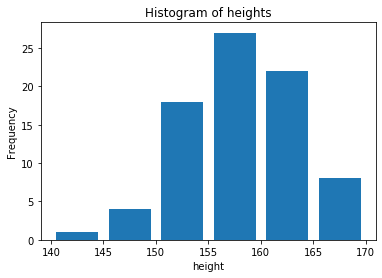

In [60]:
hist_fig = plt.figure()
height_axe = hist_fig.add_subplot(1, 1, 1)

# 빈도 구간을 정의
bins = height_axe.hist(ws_df['height'], rwidth=0.8, bins=range(140, 175, 5))
# 빈도 구간의 확인
print("빈도 구간:", bins)
print("빈도 구간:", bins[1])
print("도수 분포표:", bins[0])

height_axe.set_xlabel("height")
height_axe.set_ylabel("Frequency")
height_axe.set_title("Histogram of heights")

([<matplotlib.patches.Wedge at 0x1fb7d19a648>,
 [Text(-0.512662597214959, 1.1946451612997113, 'A'),
  Text(-1.031527367284582, -0.3820357189359907, 'B'),
  Text(0.9875849320778194, -0.4844336919877159, 'C'),
  Text(0.5338323243571601, 0.9617811858585257, 'D'),
  Text(0.1214022063305831, 1.1938431657039659, 'F')],
 [Text(-0.3154846752092055, 0.7351662531075145, '12.90%'),
  Text(-0.5626512912461356, -0.20838311941963125, '35.48%'),
  Text(0.5386826902242651, -0.26423655926602685, '38.71%'),
  Text(0.2911812678311782, 0.5246079195591958, '9.68%'),
  Text(0.07081795369284014, 0.6964085133273132, '3.23%')])

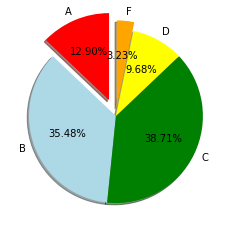

In [70]:
# pie chart :전체 데이터에 대한 비율을 표시
data = [4, 11, 12, 3, 1]
labels = ["A", "B", "C", "D", "F"]

pie_fig = plt.figure()
pie_axe = pie_fig.add_subplot(1, 1, 1)

pie_axe.pie(data, labels=labels, autopct="%.2f%%", startangle=90, 
            explode=(0.2, 0, 0, 0, 0.1), shadow=True, colors=("red", "lightblue", "green", "yellow", "orange"))